In [1]:
import pandas as pd
import polars as pl

In [ ]:
print(pl.__version__)

In [2]:
adult_census = pd.read_csv("../datasets/adult-census.csv")

In [3]:
target_name = "class"
target = adult_census[target_name]
data = adult_census.drop(columns=[target_name])

In [4]:
numeric_columns = ['age', 'capital-gain', 'capital-loss', 'hours-per-week']
data_numeric = data[numeric_columns]

In [5]:
from sklearn.model_selection import train_test_split
data_train, data_test, target_train, target_test = train_test_split(
    data_numeric, target, random_state=42
)

In [6]:
data_train.describe()

,age,capital-gain,capital-loss,hours-per-week
count,36631.000000,36631.000000,36631.000000,36631.000000
mean,38.642352,1087.077721,89.665311,40.431247
std,13.725748,7522.692939,407.110175,12.423952
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


### Scaling numeric features
* `StandardScaler`

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().set_output(transform="polars")
scaler.fit(data_train)

#### Inspect the model state of the scaler
* if attribute is learned from the data its name ends with an underscore

In [ ]:
scaler.mean_

In [ ]:
scaler.scale_

#### Once we have called the `fit` method we can perform data transformation by calling the `transform` method.
* the `fit_transform` method is shorthand to call successively `fit` and `transform`.

In [ ]:
data_train_scaled = scaler.transform(data_train)
data_train_scaled

In [11]:
scaler = StandardScaler().set_output(transform="polars")

In [12]:
data_train_scaled = scaler.fit_transform(data_train)
data_train_scaled.describe()

statistic,age,capital-gain,capital-loss,hours-per-week
str,f64,f64,f64,f64
"""count""",36631.0,36631.0,36631.0,36631.0
"""null_count""",0.0,0.0,0.0,0.0
"""mean""",-2.2656e-16,-2.1543e-17,1.6948e-17,1.4393e-16
"""std""",1.000014,1.000014,1.000014,1.000014
"""min""",-1.576792,-0.144508,-0.220251,-3.173852
"""25%""",-0.775367,-0.144508,-0.220251,-0.034711
"""50%""",-0.119656,-0.144508,-0.220251,-0.034711
"""75%""",0.681768,-0.144508,-0.220251,0.367743
"""max""",3.741752,13.148652,10.479701,4.714245


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

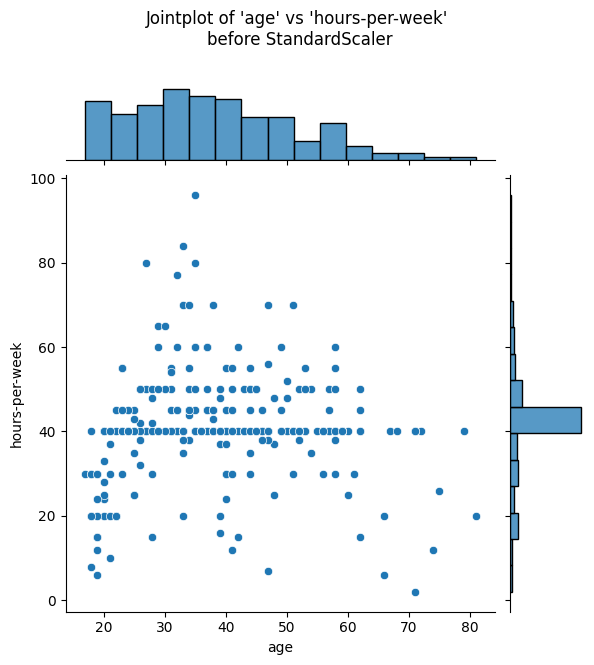

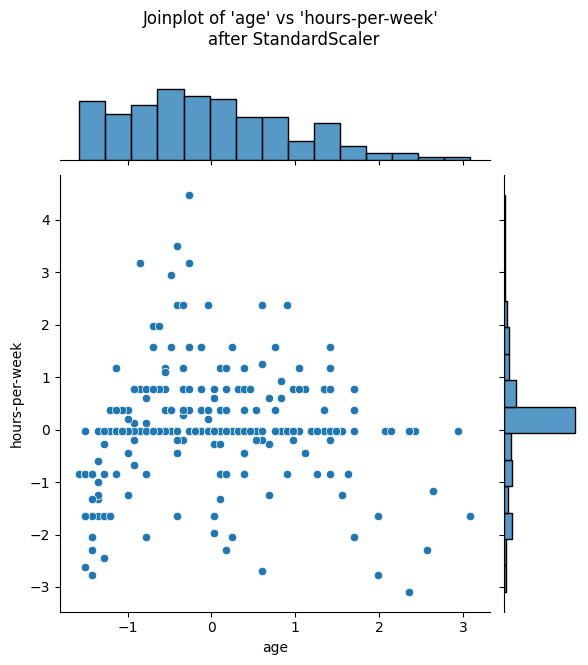

In [14]:
num_points_to_plot = 300
sns.jointplot(
    data=data_train[:num_points_to_plot],
    x="age",
    y="hours-per-week",
    marginal_kws=dict(bins=15),
)
plt.suptitle(
    "Jointplot of 'age' vs 'hours-per-week' \nbefore StandardScaler", y=1.1
)

sns.jointplot(
    data=data_train_scaled[:num_points_to_plot],
    x="age",
    y="hours-per-week",
    marginal_kws=dict(bins=15),
)
_ = plt.suptitle(
    "Joinplot of 'age' vs 'hours-per-week' \nafter StandardScaler", y=1.1
)

### Using `Pipeline` to combine sequentian operations

In [15]:
import time
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

In [16]:
model = make_pipeline(StandardScaler(), LogisticRegression())
model

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [17]:
model.named_steps

{'standardscaler': StandardScaler(),
 'logisticregression': LogisticRegression()}

In [18]:
start = time.time()
model.fit(data_train, target_train)
elapsed_time = time.time() - start

In [20]:
predicted_target = model.predict(data_test)
predicted_target[:5]

array([' <=50K', ' <=50K', ' >50K', ' <=50K', ' <=50K'], dtype=object)

In [23]:
model_name = model.__class__.__name__
score = model.score(data_test, target_test)
print(
    f"The accuracy using a {model_name} is {score:.3f} "
    f"with a fitting time of {elapsed_time:.3f} seconds "
    f"in {model[-1].n_iter_[0]} iterations"
)

The accuracy using a Pipeline is 0.807 with a fitting time of 0.126 seconds in 9 iterations
